In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression

Data=pd.read_csv('/Users/Juyoung/Desktop/BigdataProgramming-main/프로젝트/data/bigpro_test.csv',encoding='utf-8')
#data=pd.read_csv('/Users/juyoung/Desktop/빅데이터프로그래밍/프로젝트/data/bigpro_test.csv',encoding='utf-8')
Data=Data[Data['OECD']=='v']
Data=Data.dropna(axis=0)
Data=Data.reset_index()
Data

,index,Country,OECD,Real_house_price,Safety,Working_age_popul,Elderly_popul,Working_hours,Unemploy_rate,Employ_rate,Gini_coff,2018_GDP,2018_GDP_Rank,Happiness_score,Happiness_score_rank,Sub
0,0,Australia,v,102.2,63.0,65.5,15.7,1712.0,6.498750,74.275,0.325,57354.964046,10,7.272,10,0
1,1,Austria,v,117.9,81.0,66.8,18.8,1501.0,5.333500,73.575,0.280,51478.285262,13,7.139,12,-1
2,2,Belgium,v,106.4,70.0,64.2,18.8,1583.0,5.550000,65.300,0.258,47583.074941,17,6.927,16,-1
3,3,Canada,v,123.4,82.0,66.7,17.2,1670.0,9.600000,74.150,0.303,46313.171371,18,7.328,7,-11
4,4,Chile,v,111.3,48.0,68.7,11.5,1914.0,10.765000,64.125,0.460,15924.794239,45,6.476,25,-20
5,5,Czech Republic,v,131.0,72.0,64.8,19.4,1788.0,2.558250,75.150,0.249,23415.843627,35,6.711,21,-14
6,6,Denmark,v,114.3,84.0,64.0,19.5,1380.0,5.641750,75.050,0.264,61598.536704,9,7.555,3,-6
7,7,Estonia,v,112.4,69.0,64.0,19.7,1711.0,6.766500,75.275,0.305,23170.707378,37,5.739,63,26
8,8,Finland,v,101.1,85.0,62.3,21.6,1540.0,7.783250,72.975,0.269,50030.877311,14,7.632,1,-13
9,9,France,v,106.8,71.0,62.1,19.8,1505.0,8.050000,65.550,0.301,41631.090739,23,6.489,23,0


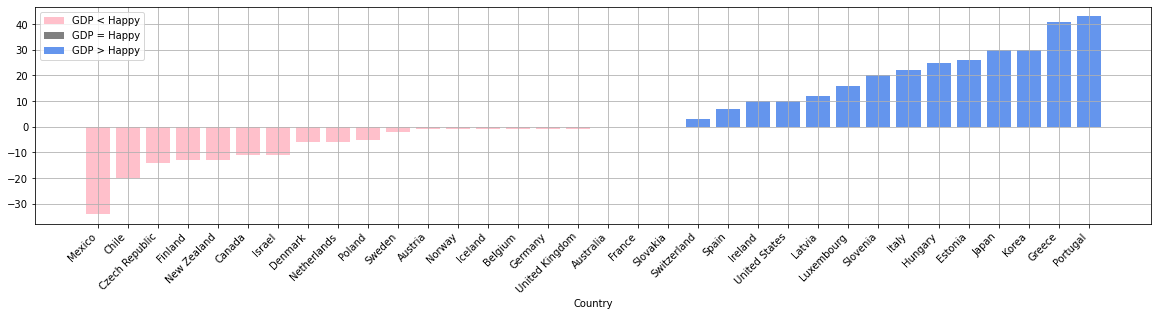

In [232]:
unhappy_data=Data[Data['Sub']>0]
happy_data=Data[Data['Sub']<0]
same_data=Data[Data['Sub']==0]
unhappy_data=unhappy_data.sort_values(by='Sub')
happy_data=happy_data.sort_values(by='Sub')
same_data=same_data.sort_values(by='Sub')

plt.figure(figsize=(20,4))
plt.bar(happy_data['Country'], happy_data['Sub'],color='pink',label='GDP < Happy')
plt.bar(same_data['Country'],same_data['Sub'],color='grey', label='GDP = Happy')
plt.bar(unhappy_data['Country'], unhappy_data['Sub'],color='cornflowerblue', label='GDP > Happy')
plt.grid(True)
plt.legend()
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.show()

In [235]:
unhappy_con=unhappy_data['Country']
happy_con=happy_data['Country']
same_con=same_data['Country']
#print("unhappy ",unhappy_con)
#print("happy ",happy_con)
print('GDP>Happy = ',len(unhappy_con),'\nGDP=Happy = ',len(same_con),'\nGDP<Happy = ',len(happy_con))

GDP>Happy =  14 
GDP=Happy =  3 
GDP<Happy =  17


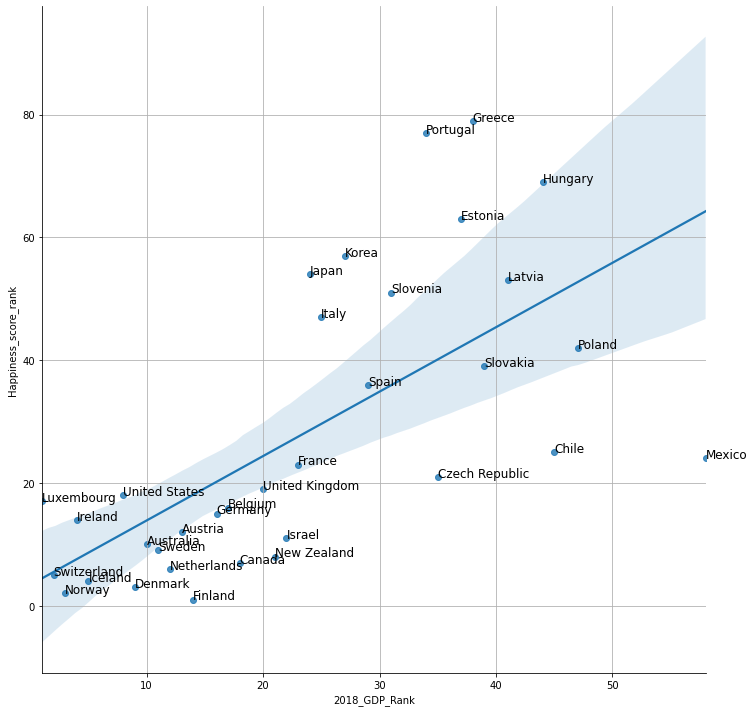

In [230]:
scatter_data=Data.sort_values(by="2018_GDP_Rank")
scatter_data=scatter_data.reset_index()

sns.lmplot(x="2018_GDP_Rank", y="Happiness_score_rank", height=10,data=scatter_data)

for i, txt in enumerate(scatter_data['Country']):
    plt.gca().annotate(txt, (scatter_data['2018_GDP_Rank'][i], scatter_data['Happiness_score_rank'][i]),size=12)

plt.grid(True)
plt.show()

In [217]:
def Make_data(dataframe, data):
    dataframe=dataframe.sort_values(by=data)
    dataframe=dataframe.reset_index()
    return dataframe

def Make_plt(dataframe,data,c):
    plt.plot(dataframe[data],dataframe['Happiness_score'],'o',color=c,label=dataframe)
    
def Make_two_plt(main_frame,happy_frame,unhappy_frame,same_frame,data):
    for i,txt in enumerate(main_frame['Country']):
        for j in (happy_frame['Country']):
            if j==txt:
                plt.plot(main_frame[data][i],main_frame['Happiness_score'][i],'o',color='tomato', markersize=10)
        for j in (unhappy_frame['Country']):
            if j==txt:
                plt.plot(main_frame[data][i],main_frame['Happiness_score'][i],'o',color='cornflowerblue', markersize=8)
        for j in (same_frame['Country']):
            if j==txt:
                plt.plot(main_frame[data][i],main_frame['Happiness_score'][i],'o',color='grey', markersize=8)
        

def Make_linear(dataframe,data):
    linear=LinearRegression()
    linear.fit(dataframe[data].values.reshape(-1,1),dataframe['Happiness_score'])
    pred=linear.predict(dataframe[data].values.reshape(-1,1))
    plt.plot(dataframe[data],linear.predict(dataframe[data].values.reshape(-1,1)),color='red')

    print('Score : ', linear.score(dataframe[data].values.reshape(-1,1),dataframe['Happiness_score']))
    print('RMSE : ', mean_squared_error(pred, dataframe['Happiness_score'])**0.5)
    print('MSE : ', mean_squared_error(pred, dataframe['Happiness_score']),'\n')
    
    print("기울기 : ",linear.coef_)
    print("절편 : ",linear.intercept_,"\n\n")
    
def Make_name(dataframe,data):
    for i, txt in enumerate(dataframe['Country']):
        plt.annotate(txt,(dataframe[data][i],dataframe['Happiness_score'][i]),size=15)
        
def Pearson_corr(dataframe,data):
    body=pd.DataFrame({'Happiness_score':dataframe['Happiness_score'],data:dataframe[data]})

    pearson_corr=body.corr(method='pearson')
    print('pearson_corr : {}\n\n'.format(pearson_corr))

In [244]:
Test=Data.filter(['Country','Real_house_price','Safety','Working_age_popul','Elderly_popul','Working_hours','Unemploy_rate','Employ_rate','Gini_corr','2018_GDP','Happiness_score','working/elder'])
Test=Test.T

Test

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
Country,Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Finland,France,...,Poland,Portugal,Slovakia,Slovenia,Korea,Spain,Sweden,Switzerland,United Kingdom,United States
Real_house_price,102.2,117.9,106.4,123.4,111.3,131,114.3,112.4,101.1,106.8,...,116.1,134.5,124.6,124,99.3,119.6,112.2,108.5,108.6,117.8
Safety,63,81,70,82,48,72,84,69,85,71,...,67,73,64,86,67,82,76,85,78,74
Working_age_popul,65.5,66.8,64.2,66.7,68.7,64.8,64,64,62.3,62.1,...,67.6,64.6,68.5,65.3,72.8,65.8,62.4,66.6,63.8,65.4
Elderly_popul,15.7,18.8,18.8,17.2,11.5,19.4,19.5,19.7,21.6,19.8,...,17.2,21.7,15.8,19.7,14.3,19.3,19.9,18.4,18.3,16
Working_hours,1712,1501,1583,1670,1914,1788,1380,1711,1540,1505,...,1806,1719,1695,1592.9,1967,1686,1452,1556.9,1538,1779
Unemploy_rate,6.49875,5.3335,5.55,9.6,10.765,2.55825,5.64175,6.7665,7.78325,8.05,...,3.2,7.108,6.68325,4.99175,3.975,15.55,8.3085,4.81525,4.47325,8.1085
Employ_rate,74.275,73.575,65.3,74.15,64.125,75.15,75.05,75.275,72.975,65.55,...,68.2,70.475,68.425,71.85,66.825,63.3,77.125,80.5,76.175,71.375
2018_GDP,57355,51478.3,47583.1,46313.2,15924.8,23415.8,61598.5,23170.7,50030.9,41631.1,...,15468.5,23562.6,19406.3,26115.9,33422.9,30389.4,54589.1,82818.1,43043.2,62996.5
Happiness_score,7.272,7.139,6.927,7.328,6.476,6.711,7.555,5.739,7.632,6.489,...,6.123,5.41,6.173,5.948,5.875,6.31,7.314,7.487,6.814,6.886


# House price

Score :  0.013904460414913111
RMSE :  0.6765106844606886
MSE :  0.4576667061894695 

기울기 :  [-0.0068376]
절편 :  7.469830072570308 




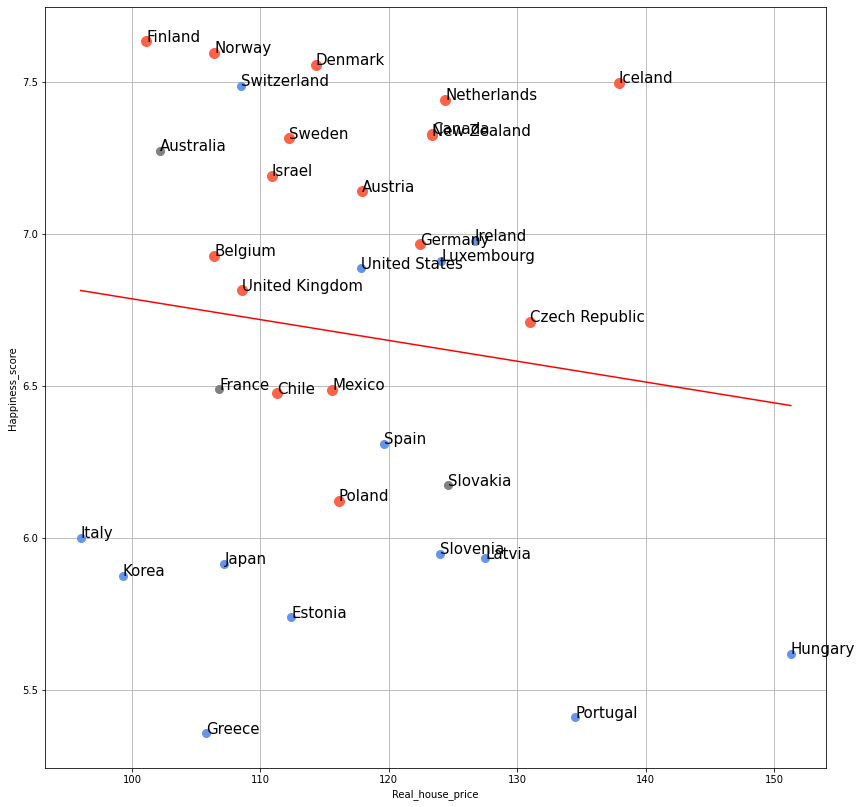

total_house_corr : SpearmanrResult(correlation=-0.0744193162723216, pvalue=0.6757385493354546)

happy_house_corr : SpearmanrResult(correlation=-0.05276077591237591, pvalue=0.8406145356254658)

unhappy_house_corr : SpearmanrResult(correlation=-0.015384615384615385, pvalue=0.9583697893719862)


In [218]:
plt.figure(figsize=(14,14))

data='Real_house_price'

house_data=Make_data(Data,data)
Make_name(house_data,data)
Make_two_plt(house_data,happy_data,unhappy_data,same_data,data)
Make_linear(house_data,data)

plt.xlabel('Real_house_price')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_house_body=pd.DataFrame({'Happiness_score':house_data['Happiness_score'],'house':house_data[data]})
total_house_corr=stats.spearmanr(total_house_body.house,total_house_body.Happiness_score)
print('total_house_corr : {}'.format(total_house_corr))

happy_house_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'house':happy_data[data]})
happy_house_corr=stats.spearmanr(happy_house_body.house,happy_house_body.Happiness_score)
print('\nhappy_house_corr : {}'.format(happy_house_corr))

unhappy_house_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'house':unhappy_data[data]})
unhappy_house_corr=stats.spearmanr(unhappy_house_body.house,unhappy_house_body.Happiness_score)
print('\nunhappy_house_corr : {}'.format(unhappy_house_corr))

# Safety

Score :  0.2750299859989841
RMSE :  0.5800630271869252
MSE :  0.33647311550925946 

기울기 :  [0.03257103]
절편 :  4.326961601230831 




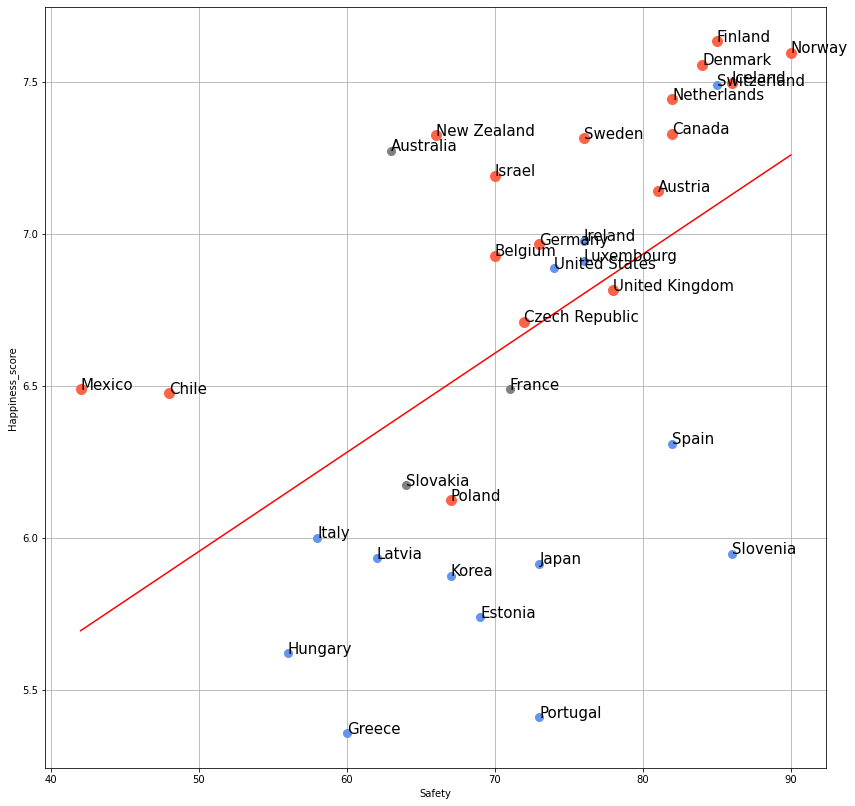

total_safety_corr : SpearmanrResult(correlation=0.6050180452336893, pvalue=0.00015037440982376978)

happy_safety_corr : SpearmanrResult(correlation=0.8220865084021362, pvalue=5.140514476142231e-05)

unhappy_safety_corr : SpearmanrResult(correlation=0.6563892574813541, pvalue=0.010783276452558773)


In [198]:
plt.figure(figsize=(14,14))

data='Safety'

safety_data=Make_data(Data,data)
Make_name(safety_data,data)
Make_two_plt(safety_data,happy_data,unhappy_data,same_data,data)
Make_linear(safety_data,data)

plt.xlabel('Safety')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_safety_body=pd.DataFrame({'Happiness_score':safety_data['Happiness_score'],'Safety':safety_data[data]})
total_safety_corr=stats.spearmanr(total_safety_body.Safety,total_safety_body.Happiness_score)
print('total_safety_corr : {}'.format(total_safety_corr))

happy_safety_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'Safety':happy_data[data]})
happy_safety_corr=stats.spearmanr(happy_safety_body.Safety,happy_safety_body.Happiness_score)
print('\nhappy_safety_corr : {}'.format(happy_safety_corr))

unhappy_safety_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'Safety':unhappy_data[data]})
unhappy_safety_corr=stats.spearmanr(unhappy_safety_body.Safety,unhappy_safety_body.Happiness_score)
print('\nunhappy_safety_corr : {}'.format(unhappy_safety_corr))

# Working/Elder

Score :  0.06165156764379398
RMSE :  0.6599290239371257
MSE :  0.4355063166346074 

기울기 :  [-2.61359658]
절편 :  7.392349541368315 




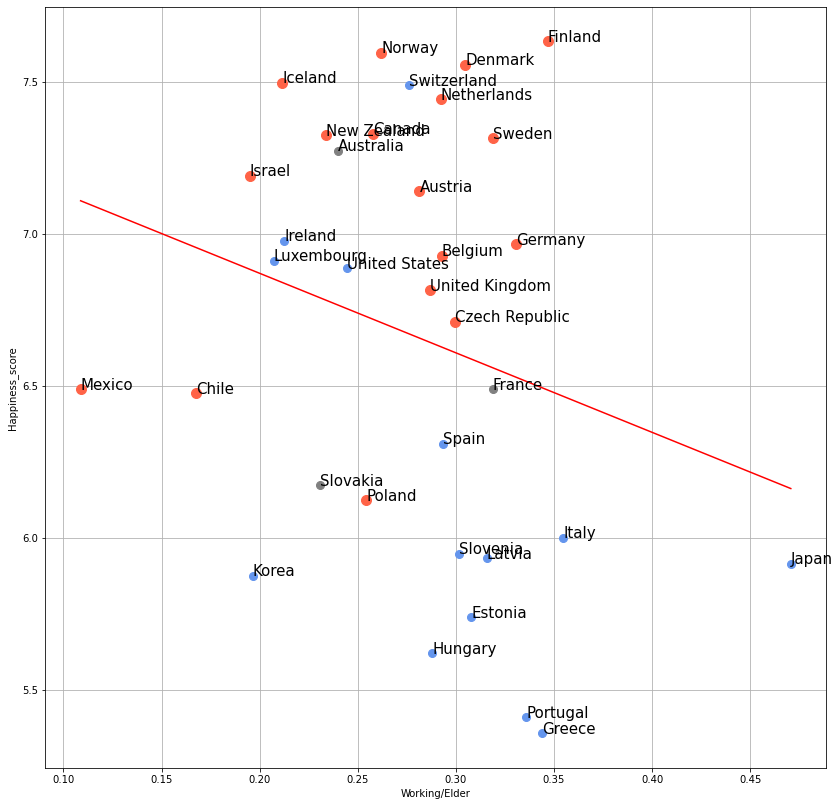

total_working/elder_corr : SpearmanrResult(correlation=-0.22872421695951106, pvalue=0.19321668173396997)

happy_working/elder_corr : SpearmanrResult(correlation=0.33333333333333337, pvalue=0.19105762734590404)

unhappy_working/elder_corr : SpearmanrResult(correlation=-0.4945054945054946, pvalue=0.07224967403413257)


In [199]:
plt.figure(figsize=(14,14))

Data['working/elder']=Data['Elderly_popul']/Data['Working_age_popul']
happy_data['working/elder']=happy_data['Elderly_popul']/happy_data['Working_age_popul']
unhappy_data['working/elder']=unhappy_data['Elderly_popul']/unhappy_data['Working_age_popul']

data='working/elder'

we_data=Make_data(Data,data)
Make_name(we_data,data)
Make_two_plt(we_data,happy_data,unhappy_data,same_data,data)
Make_linear(we_data,data)

plt.xlabel('Working/Elder')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_we_body=pd.DataFrame({'Happiness_score':we_data['Happiness_score'],'we':we_data[data]})
total_we_corr=stats.spearmanr(total_we_body.we,total_we_body.Happiness_score)
print('total_working/elder_corr : {}'.format(total_we_corr))

happy_we_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'we':happy_data[data]})
happy_we_corr=stats.spearmanr(happy_we_body.we,happy_we_body.Happiness_score)
print('\nhappy_working/elder_corr : {}'.format(happy_we_corr))

unhappy_we_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'we':unhappy_data[data]})
unhappy_we_corr=stats.spearmanr(unhappy_we_body.we,unhappy_we_body.Happiness_score)
print('\nunhappy_working/elder_corr : {}'.format(unhappy_we_corr))

# Working_hours

Score :  0.2541061021676758
RMSE :  0.5883742936382069
MSE :  0.346184309414259 

기울기 :  [-0.00189796]
절편 :  9.827487230764886 




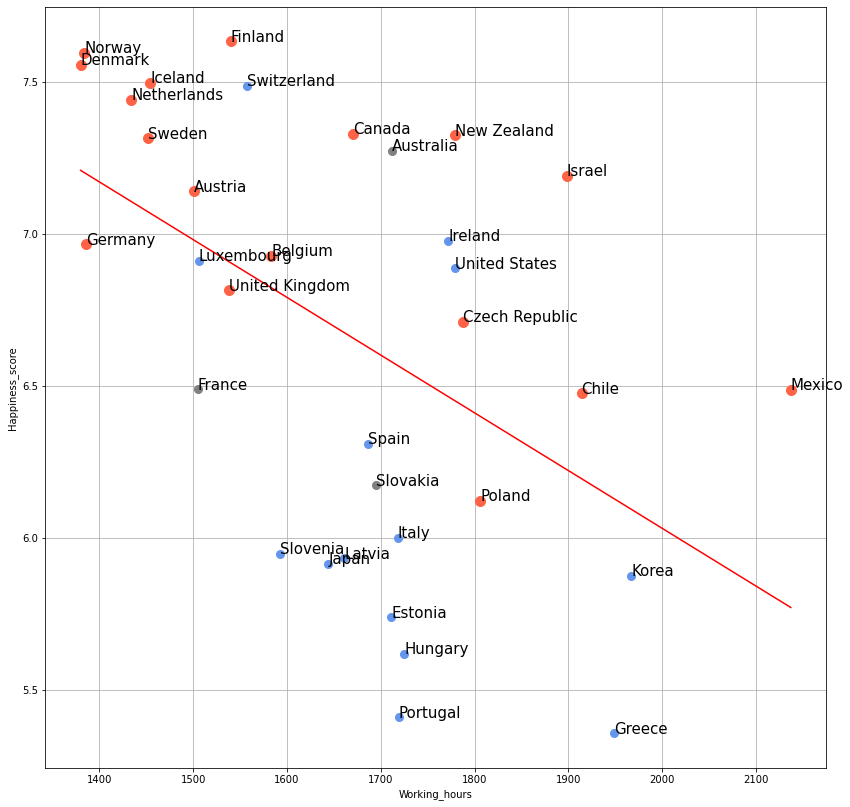

total_working/elder_corr : SpearmanrResult(correlation=-0.5473298205292999, pvalue=0.000808073409247039)

happy_Working_hours_corr : SpearmanrResult(correlation=-0.6519607843137255, pvalue=0.004568346266924807)

unhappy_Working_hours_corr : SpearmanrResult(correlation=-0.432967032967033, pvalue=0.12201000596848026)


In [157]:
plt.figure(figsize=(14,14))

data='Working_hours'

hours_data=Make_data(Data,data)
Make_name(hours_data,data)
Make_two_plt(hours_data,happy_data,unhappy_data,same_data,data)
Make_linear(hours_data,data)

plt.xlabel('Working_hours')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_hours_body=pd.DataFrame({'Happiness_score':hours_data['Happiness_score'],'hours':hours_data[data]})
total_hours_corr=stats.spearmanr(total_hours_body.hours,total_hours_body.Happiness_score)
print('total_working/elder_corr : {}'.format(total_hours_corr))

happy_hours_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'hours':happy_data[data]})
happy_hours_corr=stats.spearmanr(happy_hours_body.hours,happy_hours_body.Happiness_score)
print('\nhappy_Working_hours_corr : {}'.format(happy_hours_corr))

unhappy_hours_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'hours':unhappy_data[data]})
unhappy_hours_corr=stats.spearmanr(unhappy_hours_body.hours,unhappy_hours_body.Happiness_score)
print('\nunhappy_Working_hours_corr : {}'.format(unhappy_hours_corr))

# Employ_rate

Score :  0.2991897300251881
RMSE :  0.5703157844782548
MSE :  0.3252600940250472 

기울기 :  [0.06153245]
절편 :  2.2810487727069564 




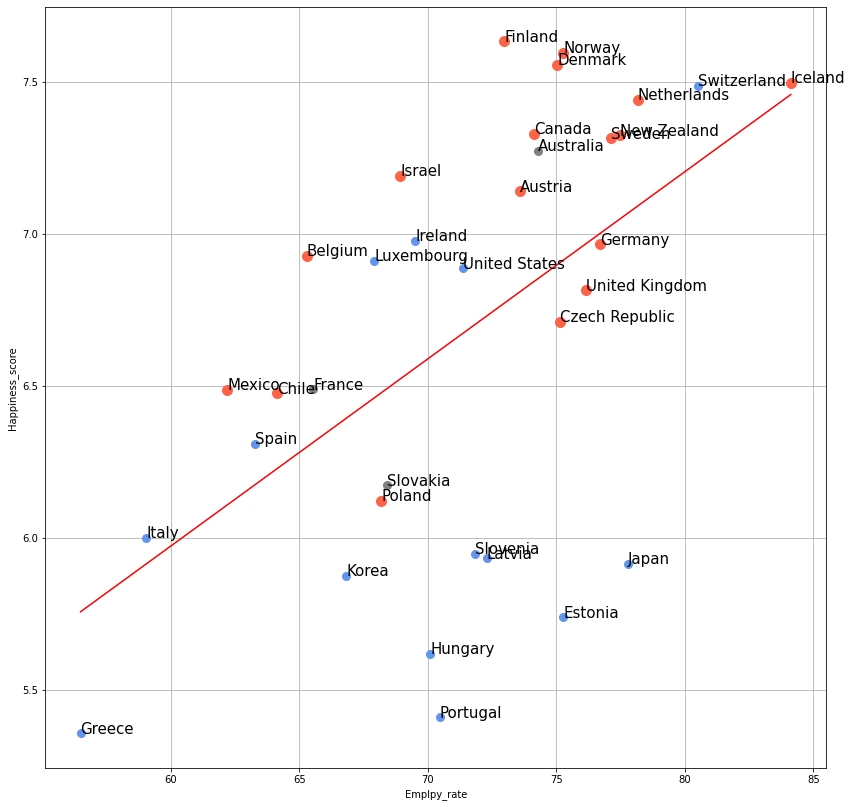

total_employ_corr : SpearmanrResult(correlation=0.5167698082161062, pvalue=0.0017530689711709052)

happy_employ_corr : SpearmanrResult(correlation=0.5000000000000001, pvalue=0.040968955955836106)

unhappy_employ_corr : SpearmanrResult(correlation=0.15164835164835166, pvalue=0.6047905984521367)


In [158]:
plt.figure(figsize=(14,14))

data='Employ_rate'

employ_data=Make_data(Data,data)
Make_name(employ_data,data)
Make_two_plt(employ_data,happy_data,unhappy_data,same_data,data)
Make_linear(employ_data,data)

plt.xlabel('Emplpy_rate')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_employ_body=pd.DataFrame({'Happiness_score':employ_data['Happiness_score'],'employ':employ_data[data]})
total_employ_corr=stats.spearmanr(total_employ_body.employ,total_employ_body.Happiness_score)
print('total_employ_corr : {}'.format(total_employ_corr))

happy_employ_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'employ':happy_data[data]})
happy_employ_corr=stats.spearmanr(happy_employ_body.employ,happy_employ_body.Happiness_score)
print('\nhappy_employ_corr : {}'.format(happy_employ_corr))

unhappy_employ_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'employ':unhappy_data[data]})
unhappy_employ_corr=stats.spearmanr(unhappy_employ_body.employ,unhappy_employ_body.Happiness_score)
print('\nunhappy_employ_corr : {}'.format(unhappy_employ_corr))

# Gini_coff

Score :  0.03522420541547766
RMSE :  0.6691575189600635
MSE :  0.4477717851807877 

기울기 :  [-2.45475743]
절편 :  7.434619407313358 




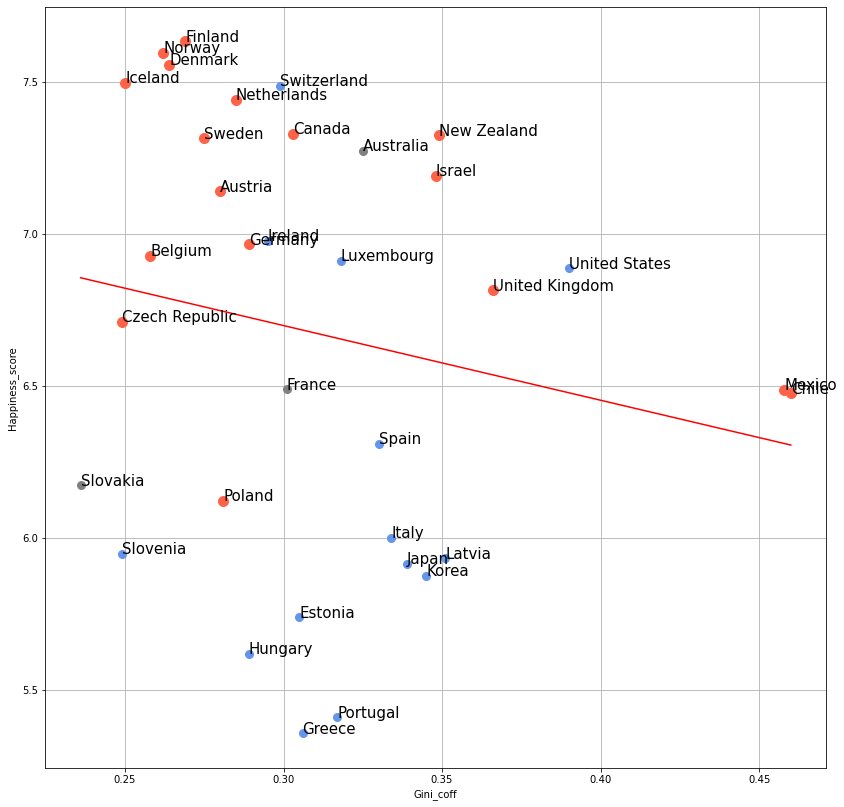

total_gini_corr : SpearmanrResult(correlation=-0.3060819106641892, pvalue=0.07831944276210083)

happy_gini_corr : SpearmanrResult(correlation=-0.40196078431372556, pvalue=0.10973047964744011)

unhappy_gini_corr : SpearmanrResult(correlation=0.03736263736263736, pvalue=0.899093096973967)


In [159]:
plt.figure(figsize=(14,14))

data='Gini_coff'

gini_data=Make_data(Data,data)
Make_name(gini_data,data)
Make_two_plt(gini_data,happy_data,unhappy_data,same_data,data)
Make_linear(gini_data,data)

plt.xlabel('Gini_coff')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_gini_body=pd.DataFrame({'Happiness_score':gini_data['Happiness_score'],'gini':gini_data[data]})
total_gini_corr=stats.spearmanr(total_gini_body.gini,total_gini_body.Happiness_score)
print('total_gini_corr : {}'.format(total_gini_corr))

happy_gini_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'gini':happy_data[data]})
happy_gini_corr=stats.spearmanr(happy_gini_body.gini,happy_gini_body.Happiness_score)
print('\nhappy_gini_corr : {}'.format(happy_gini_corr))

unhappy_gini_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'gini':unhappy_data[data]})
unhappy_gini_corr=stats.spearmanr(unhappy_gini_body.gini,unhappy_gini_body.Happiness_score)
print('\nunhappy_gini_corr : {}'.format(unhappy_gini_corr))